In [1]:
#this file is to optimize the parameters in a single LSTM like number of neurons per layer
#and number of epoch
import numpy as np 
import pandas as pd 

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pdf = pd.read_csv('poloniex_usdt_pairs.csv')
new_df = pd.DataFrame(pdf[1:])
new_df = new_df.set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))
#BCH data set has too many NAN value, so I discard it
df1=new_df.drop({'USDT_BCH','USDT_BCH.1','USDT_BCH.2'},axis=1)
#discard the NAN value in last 3 rows
df1=df1[:-3]
#df1.isnull().sum()
x_set=df1.iloc[:,:]
y_set=df1.iloc[1:,2:3]
y_set=y_set.apply(lambda x: pd.Series([float(i) for i in x]))


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y_set.shape

(125387, 1)

In [4]:
def main_training (x,y,train_end,data_to_use, n_neuron,n_epoch):
   
    x_train=np.array(x[0:train_end])
    y_train=np.array(y[0:train_end])
    x_test=np.array(x[train_end+1:data_to_use+1])
    y_test=np.array(y[train_end+1:data_to_use+1])

    print(x_train.shape,x_test.shape)
    print(y_train.shape,y_test.shape)
    x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
    x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
    
    mod1 = Sequential ()
    mod1.add (LSTM (n_neuron, activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(1,11) ))
    mod1.add(Dropout(0.2))
    mod1.add (Dense (output_dim =1, activation = 'linear'))
 
    mod1.compile (loss ="mse" , optimizer = "adam")   
    mod1.fit (x_train, y_train, batch_size =int(len(x_train)/n_epoch), nb_epoch =n_epoch, shuffle = False)
    
    trainpredict=mod1.predict(x_train)
    testpredict=mod1.predict(x_test)
    
    
    return (trainpredict, testpredict,y_train,y_test)

In [5]:
def mean_error_dollar (trainpredict,testpredict,y_train,y_test,change_factor=None):
    #mean_error_square=sum((y_test-testpredict)**2)/len(y_test)
    testpredict=scaler_y.inverse_transform(np.array(testpredict))
    y_test=scaler_y.inverse_transform(np.array(y_test))
    trainpredict=scaler_y.inverse_transform(np.array(trainpredict))
    y_train=scaler_y.inverse_transform(np.array(y_train))
    
    #plot training set and testing set prediction vs real data
    plt.figure()
    plt.plot(y_train,color='blue')
    plt.plot(trainpredict, color='red')
    plt.title('training set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    
    plt.figure()
    plt.plot(y_test,color='blue')
    plt.plot(testpredict, color='red')
    plt.title('test set'+change_factor)
    plt.xlabel('Time Points',fontsize=14)
    plt.ylabel('US Dollars',fontsize=14)
    mean_error_test=sum(abs(y_test-testpredict))/len(y_test)
    mean_error_train=sum(abs(y_train-trainpredict))/len(y_train)
    return (mean_error_test,mean_error_train)


(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
8000/8000 [==============================] - 0s 48us/step - loss: 1.1608
Epoch 2/10
8000/8000 [==============================] - 0s 10us/step - loss: 1.1258
Epoch 3/10
8000/8000 [==============================] - 0s 9us/step - loss: 1.0898
Epoch 4/10
8000/8000 [==============================] - 0s 9us/step - loss: 1.0561
Epoch 5/10
8000/8000 [==============================] - 0s 10us/step - loss: 1.0237
Epoch 6/10
8000/8000 [==============================] - 0s 10us/step - loss: 0.9926
Epoch 7/10
8000/8000 [==============================] - 0s 10us/step - loss: 0.9619
Epoch 8/10
8000/8000 [==============================] - 0s 9us/step - loss: 0.9329
Epoch 9/10
8000/8000 [==============================] - 0s 10us/step - loss: 0.9045
Epoch 10/10
8000/8000 [==============================] - 0s 11us/step - loss: 0.8791
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(5, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 0s 56us/step - loss: 0.9238
Epoch 2/10
8000/8000 [==============================] - 0s 14us/step - loss: 0.8611
Epoch 3/10
8000/8000 [==============================] - 0s 13us/step - loss: 0.8044
Epoch 4/10
8000/8000 [==============================] - 0s 13us/step - loss: 0.7470
Epoch 5/10
8000/8000 [==============================] - 0s 12us/step - loss: 0.6942
Epoch 6/10
8000/8000 [==============================] - 0s 11us/step - loss: 0.6457
Epoch 7/10
8000/8000 [==============================] - 0s 12us/step - loss: 0.5967
Epoch 8/10
8000/8000 [==============================] - 0s 13us/step - loss: 0.5486
Epoch 9/10
8000/8000 [==============================] - 0s 12us/step - loss: 0.5086
Epoch 10/10
8000/8000 [==============================] - 0s 12us/step - loss: 0.4704
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 1s 64us/step - loss: 0.9668
Epoch 2/10
8000/8000 [==============================] - 0s 9us/step - loss: 0.8926
Epoch 3/10
8000/8000 [==============================] - 0s 9us/step - loss: 0.8212
Epoch 4/10
8000/8000 [==============================] - 0s 20us/step - loss: 0.7554
Epoch 5/10
8000/8000 [==============================] - 0s 10us/step - loss: 0.6892
Epoch 6/10
8000/8000 [==============================] - 0s 8us/step - loss: 0.6293
Epoch 7/10
8000/8000 [==============================] - 0s 7us/step - loss: 0.5699
Epoch 8/10
8000/8000 [==============================] - 0s 8us/step - loss: 0.5145
Epoch 9/10
8000/8000 [==============================] - 0s 12us/step - loss: 0.4616
Epoch 10/10
8000/8000 [==============================] - 0s 8us/step - loss: 0.4101
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 1s 73us/step - loss: 0.9419
Epoch 2/10
8000/8000 [==============================] - 0s 14us/step - loss: 0.8244
Epoch 3/10
8000/8000 [==============================] - 0s 15us/step - loss: 0.7145
Epoch 4/10
8000/8000 [==============================] - 0s 15us/step - loss: 0.6075
Epoch 5/10
8000/8000 [==============================] - 0s 15us/step - loss: 0.5049
Epoch 6/10
8000/8000 [==============================] - 0s 19us/step - loss: 0.4082
Epoch 7/10
8000/8000 [==============================] - 0s 17us/step - loss: 0.3166
Epoch 8/10
8000/8000 [==============================] - 0s 14us/step - loss: 0.2328
Epoch 9/10
8000/8000 [==============================] - 0s 16us/step - loss: 0.1606
Epoch 10/10
8000/8000 [==============================] - 0s 14us/step - loss: 0.1032
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 1s 89us/step - loss: 0.9514
Epoch 2/10
8000/8000 [==============================] - 0s 36us/step - loss: 0.7924
Epoch 3/10
8000/8000 [==============================] - 0s 37us/step - loss: 0.6468
Epoch 4/10
8000/8000 [==============================] - 0s 32us/step - loss: 0.5096
Epoch 5/10
8000/8000 [==============================] - 0s 37us/step - loss: 0.3808
Epoch 6/10
8000/8000 [==============================] - 0s 30us/step - loss: 0.2628
Epoch 7/10
8000/8000 [==============================] - 0s 25us/step - loss: 0.1631
Epoch 8/10
8000/8000 [==============================] - 0s 27us/step - loss: 0.0873
Epoch 9/10
8000/8000 [==============================] - 0s 28us/step - loss: 0.0374
Epoch 10/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.0129
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 1s 168us/step - loss: 0.9122
Epoch 2/10
8000/8000 [==============================] - 1s 72us/step - loss: 0.7014
Epoch 3/10
8000/8000 [==============================] - 0s 59us/step - loss: 0.5101
Epoch 4/10
8000/8000 [==============================] - 1s 64us/step - loss: 0.3368
Epoch 5/10
8000/8000 [==============================] - 1s 67us/step - loss: 0.1891
Epoch 6/10
8000/8000 [==============================] - 1s 83us/step - loss: 0.0815
Epoch 7/10
8000/8000 [==============================] - 0s 61us/step - loss: 0.0220
Epoch 8/10
8000/8000 [==============================] - 0s 59us/step - loss: 0.0031
Epoch 9/10
8000/8000 [==============================] - 0s 61us/step - loss: 0.0022
Epoch 10/10
8000/8000 [==============================] - 0s 55us/step - loss: 0.0027
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(500, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 3s 345us/step - loss: 0.7854
Epoch 2/10
8000/8000 [==============================] - 2s 274us/step - loss: 0.4863
Epoch 3/10
8000/8000 [==============================] - 2s 238us/step - loss: 0.2355
Epoch 4/10
8000/8000 [==============================] - 2s 242us/step - loss: 0.0647
Epoch 5/10
8000/8000 [==============================] - 2s 245us/step - loss: 0.0041
Epoch 6/10
8000/8000 [==============================] - 2s 280us/step - loss: 0.0059
Epoch 7/10
8000/8000 [==============================] - 2s 266us/step - loss: 0.0041
Epoch 8/10
8000/8000 [==============================] - 2s 252us/step - loss: 9.1610e-04
Epoch 9/10
8000/8000 [==============================] - 2s 245us/step - loss: 9.3442e-04
Epoch 10/10
8000/8000 [==============================] - 2s 272us/step - loss: 8.1159e-04
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.7874
Epoch 2/10
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3831
Epoch 3/10
8000/8000 [==============================] - 8s 987us/step - loss: 0.0993
Epoch 4/10
8000/8000 [==============================] - 7s 895us/step - loss: 0.0050
Epoch 5/10
8000/8000 [==============================] - 7s 886us/step - loss: 0.0138
Epoch 6/10
8000/8000 [==============================] - 7s 880us/step - loss: 0.0032
Epoch 7/10
8000/8000 [==============================] - 8s 960us/step - loss: 0.0012
Epoch 8/10
8000/8000 [==============================] - 9s 1ms/step - loss: 0.0010
Epoch 9/10
8000/8000 [==============================] - 8s 958us/step - loss: 3.8595e-04
Epoch 10/10
8000/8000 [==============================] - 7s 836us/step - loss: 4.6017e-04
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(2000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


Epoch 1/10
8000/8000 [==============================] - 26s 3ms/step - loss: 0.6852
Epoch 2/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.1892
Epoch 3/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.0116
Epoch 4/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.0240
Epoch 5/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.0019
Epoch 6/10
8000/8000 [==============================] - 23s 3ms/step - loss: 0.0033
Epoch 7/10
8000/8000 [==============================] - 23s 3ms/step - loss: 4.0271e-04
Epoch 8/10
8000/8000 [==============================] - 23s 3ms/step - loss: 5.8867e-04
Epoch 9/10
8000/8000 [==============================] - 23s 3ms/step - loss: 2.5469e-04
Epoch 10/10
8000/8000 [==============================] - 25s 3ms/step - loss: 2.3881e-04


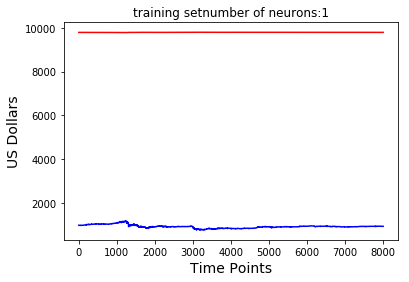

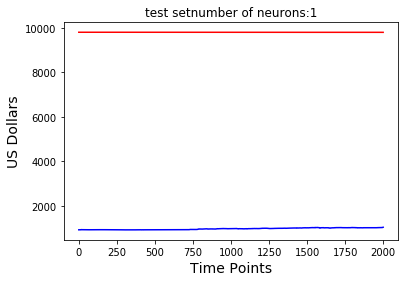

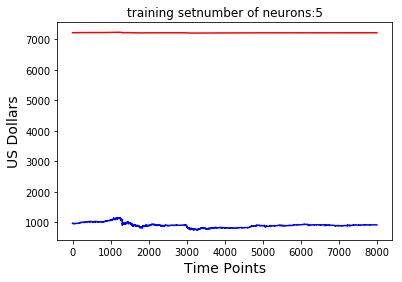

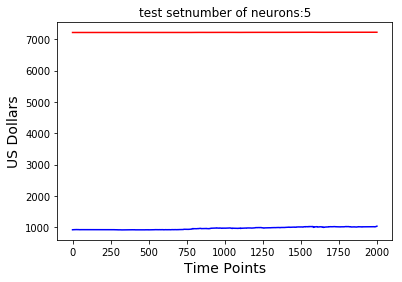

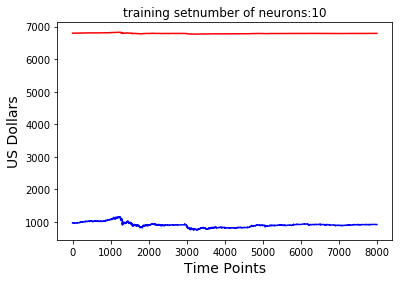

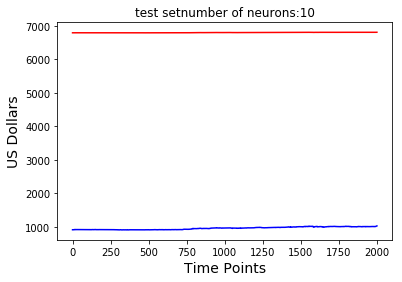

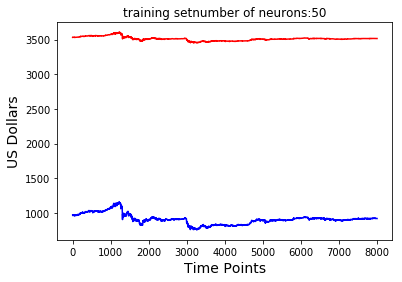

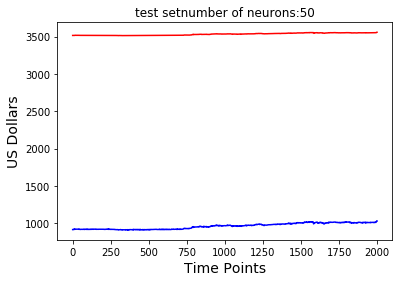

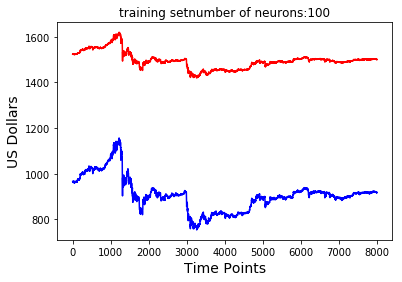

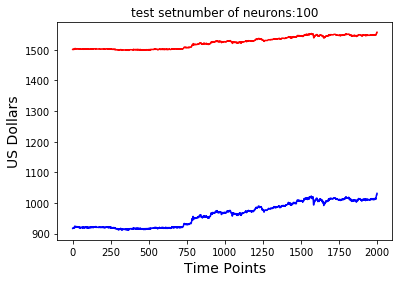

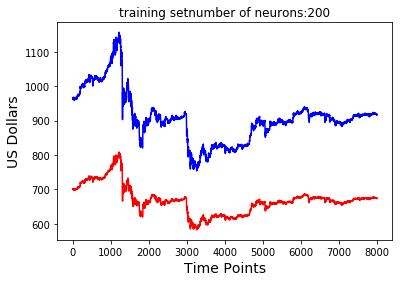

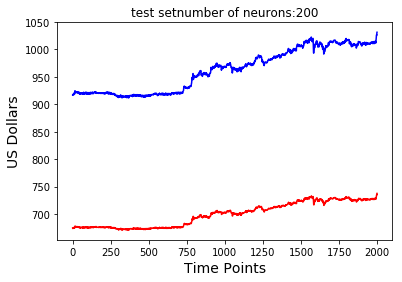

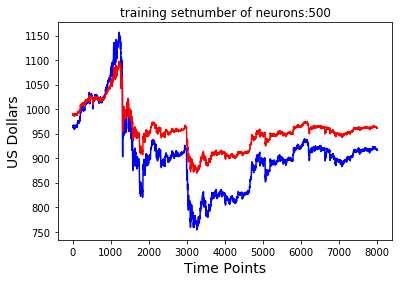

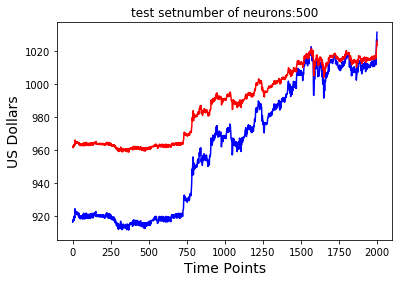

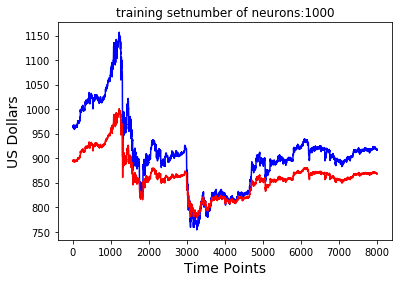

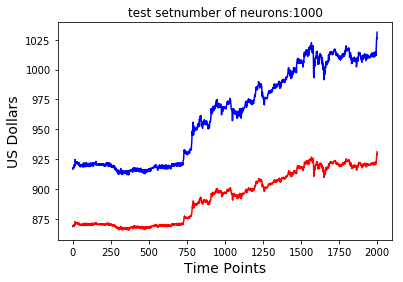

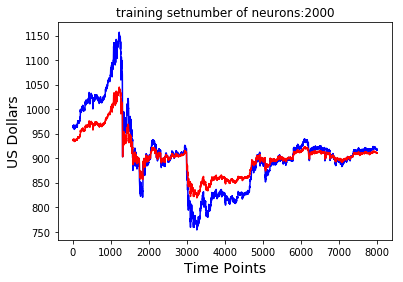

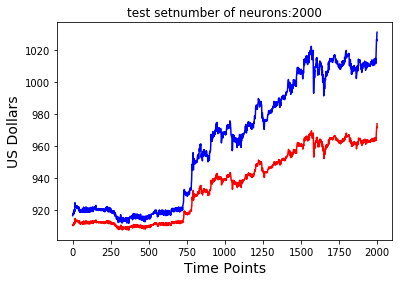

In [6]:
#normalization
scaler_x=MinMaxScaler(feature_range=(-1,1))
x=scaler_x.fit_transform(x_set)
scaler_y=MinMaxScaler(feature_range=(-1,1))
y=scaler_y.fit_transform(y_set)


data_to_use=10000
train_end=int(data_to_use*0.8)
total_data=len(df1)
#start=total_data-data_to_use
#n_neurons=[1,5,10,50,100,200]
n_neurons=[1,5,10,50,100,200,500,1000,2000]
n_epoch=10
mean_error_test_l=list([])
mean_error_train_l=list([])
for n_neuron in n_neurons:
    trainpredict,testpredict,y_train,y_test=main_training(x,y,train_end,data_to_use, n_neuron,n_epoch)
    mean_error_test,mean_error_train=mean_error_dollar(trainpredict,testpredict,y_train,y_test,
                                                   change_factor='{}'.format('number of neurons:'+str(n_neuron)))
    mean_error_test_l.append(mean_error_test)
    mean_error_train_l.append(mean_error_train)
    

Text(0,0.5,'US Dollars')

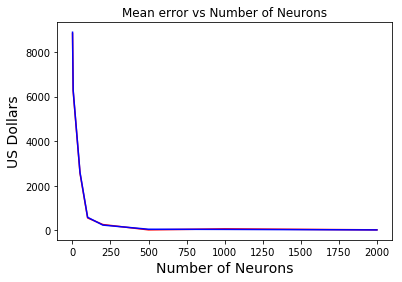

In [7]:
plt.plot(n_neurons,mean_error_test_l,color='red')
plt.plot(n_neurons,mean_error_train_l,color='blue')
plt.title('Mean error vs Number of Neurons')
plt.xlabel('Number of Neurons',fontsize=14)
plt.ylabel('US Dollars',fontsize=14)

Text(0,0.5,'US Dollars')

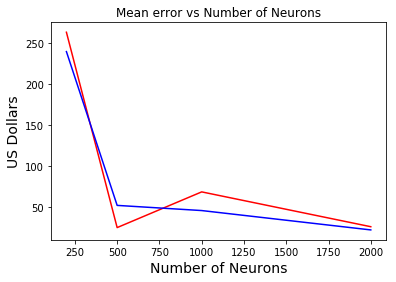

In [8]:
plt.plot(n_neurons[5:9],mean_error_test_l[5:9],color='red')
plt.plot(n_neurons[5:9],mean_error_train_l[5:9],color='blue')
plt.title('Mean error vs Number of Neurons')
plt.xlabel('Number of Neurons',fontsize=14)
plt.ylabel('US Dollars',fontsize=14)

(8000, 1) (2000, 1)
(8000, 1) (2000, 1)


/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(500, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
8000/8000 [==============================] - 5s 638us/step - loss: 0.9602
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)
Epoch 1/5
8000/8000 [==============================] - 4s 505us/step - loss: 0.8793
Epoch 2/5
8000/8000 [==============================] - 2s 202us/step - loss: 0.7142
Epoch 3/5
8000/8000 [==============================] - 2s 254us/step - loss: 0.5614
Epoch 4/5
8000/8000 [==============================] - 2s 214us/step - loss: 0.4211
Epoch 5/5
8000/8000 [==============================] - 2s 208us/step - loss: 0.2934
(8000, 1) (2000, 1)
(8000, 1) (2000, 1)
Epoch 1/10
8000/8000 [==============================] - 4s 536us/step - loss: 0.8143
Epoch 2/10
8000/8000 [==============================] - 2s 228us/step - loss: 0.5112
Epoch 3/10
8000/8000 [==============================] - 2s 226us/step - loss: 0.2562
Epoch 4/10
8000/8000 [==============================] - 2s 234us/step - loss: 0.0765
Epoch 5/10
8000/8000 [==============================] - 2s 228us/step - loss

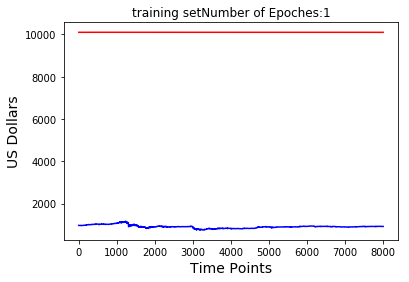

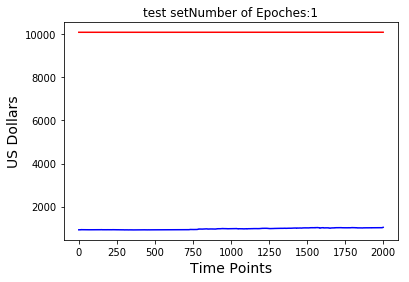

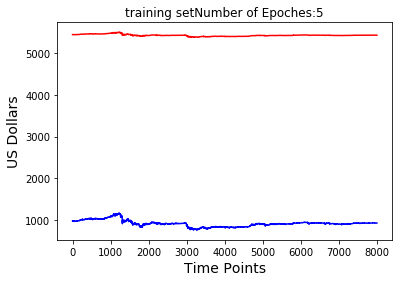

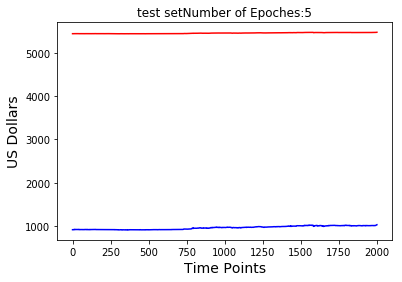

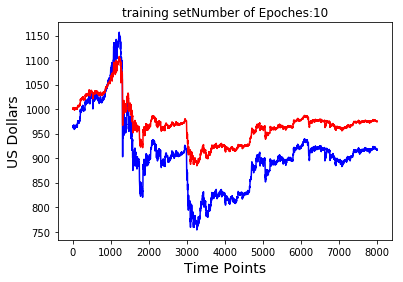

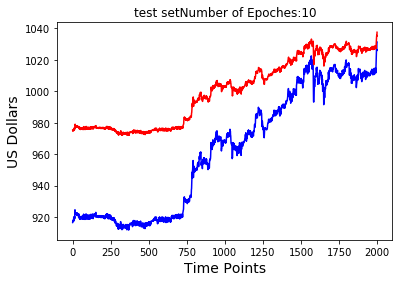

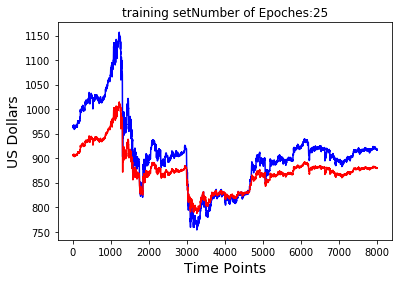

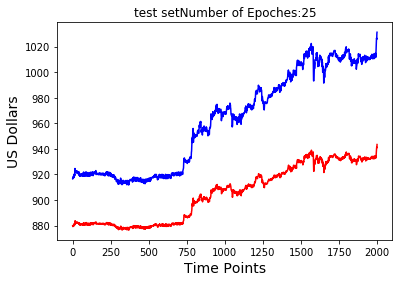

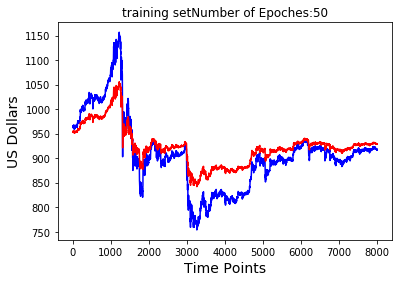

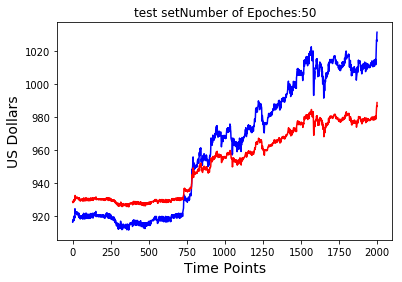

In [12]:
#normalization
scaler_x=MinMaxScaler(feature_range=(-1,1))
x=scaler_x.fit_transform(x_set)
scaler_y=MinMaxScaler(feature_range=(-1,1))
y=scaler_y.fit_transform(y_set)


data_to_use=10000
train_end=int(data_to_use*0.8)
total_data=len(df1)
#start=total_data-data_to_use
#n_neurons=[1,5,10,50,100,200]
#n_neurons=[1,5,10,50,100,200,500,1000,2000]
n_neuron=500
#n_epoch=10
n_epoches=[1,5,10,25,50]
#n_epoches=[100]
mean_error_test_l=list([])
mean_error_train_l=list([])
for n_epoch in n_epoches:
    trainpredict,testpredict,y_train,y_test=main_training(x,y,train_end,data_to_use, n_neuron,n_epoch)
    mean_error_test,mean_error_train=mean_error_dollar(trainpredict,testpredict,y_train,y_test,
                                                   change_factor='{}'.format('Number of Epoches:'+str(n_epoch)))
    mean_error_test_l.append(mean_error_test)
    mean_error_train_l.append(mean_error_train)

Text(0,0.5,'US Dollars')

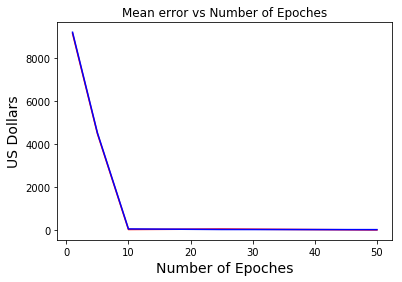

In [13]:
plt.plot(n_epoches,mean_error_test_l,color='red')
plt.plot(n_epoches,mean_error_train_l,color='blue')
plt.title('Mean error vs Number of Epoches')
plt.xlabel('Number of Epoches',fontsize=14)
plt.ylabel('US Dollars',fontsize=14)

Text(0,0.5,'US Dollars')

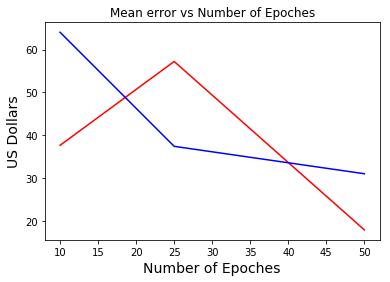

In [15]:
plt.plot(n_epoches[2:6],mean_error_test_l[2:6],color='red')
plt.plot(n_epoches[2:6],mean_error_train_l[2:6],color='blue')
plt.title('Mean error vs Number of Epoches')
plt.xlabel('Number of Epoches',fontsize=14)
plt.ylabel('US Dollars',fontsize=14)

[array([ 9152.54059138]),
 array([ 2308.8747342]),
 array([ 61.5436328]),
 array([ 27.97076684])]